# Import recommended packages

In [ ]:
import segyio
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import exposure

# Loading in data
Also saving the datasets I will use as variables:  
    **sx** = x coordinates (UTM coords)   
    **sy** = y coordinates (UTM coors)  
    **dt** = sample intervals (ms)  


Number of traces: 494
Samples per trace: 4999
Data shape: (494, 4999)
Source X coordinate from 636474 to 636548
Source y coordinate from -2080646 to -2080276
sample interval (ms): 0.1


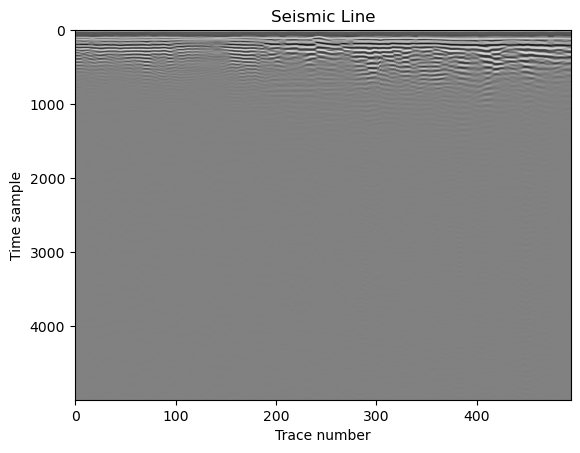

In [ ]:
# open SEG-Y in read mode
# note that the with statement is essentially saying f = sgeyio.open(..., "r", ignore_geometry=True)
# 'r' just means read mode
# ignore_geometry=True tells segyio to not assume 3D inline/xline geometry
with segyio.open("/Users/ming.../Desktop/SIO_199/Okavango/Line0030_processed.sgy", "r", ignore_geometry=True) as f:
    print("Number of traces:", f.tracecount) # f.tracecount gives the number of traces in the file
    print("Samples per trace:", f.samples.size) # f.samples.size gives the number of samples per trace

    # build numpy array [n_traces x n_samples]
    data = np.zeros((f.tracecount, f.samples.size), dtype=np.float32) # Creates a canvas of zeros with the shape of (number of traces, number of samples)
    # fill the array with trace data
    for i in range(f.tracecount):
        data[i, :] = f.trace[i]
    
    # grab headers (source coordinates)
    sx = np.array([f.header[i][segyio.TraceField.SourceX] for i in range(f.tracecount)]) # Coordinates x
    sy = np.array([f.header[i][segyio.TraceField.SourceY] for i in range(f.tracecount)]) # Coordinates y

    dt = f.bin[segyio.BinField.Interval] / 1000  # collecting sample interval in ms

# Printing information exatracted from the SEG-Y file
print("Data shape:", data.shape)
print("Source X coordinate from", sx[0], "to", sx[-1])
print("Source y coordinate from", sy[0], "to", sy[-1])
print("sample interval (ms):", dt)

# display seismic line
plt.imshow(data.T, cmap="gray", aspect="auto") # Transpose to have traces on x-axis in data.T
plt.title("Seismic Line")
plt.xlabel("Trace number")
plt.ylabel("Time sample")
plt.show()

## Finding out real distances
Variables:  
**dx** and **dy** = distance in the x direction and y direction respectively  
**dist** = sqrt(dx^2 + dy^2) to find the distance of the sample line

In [ ]:
# compute cumulative distance along the line
dx = np.diff(sx)
dy = np.diff(sy)
# This uses Euclidean distances 
dist = np.concatenate(([0], np.cumsum(np.sqrt(dx**2 + dy**2))))

print("Data shape:", data.shape)
print("Profile length (m):", dist[-1])

Data shape: (494, 4999)
Profile length (m): 431.1824920538549


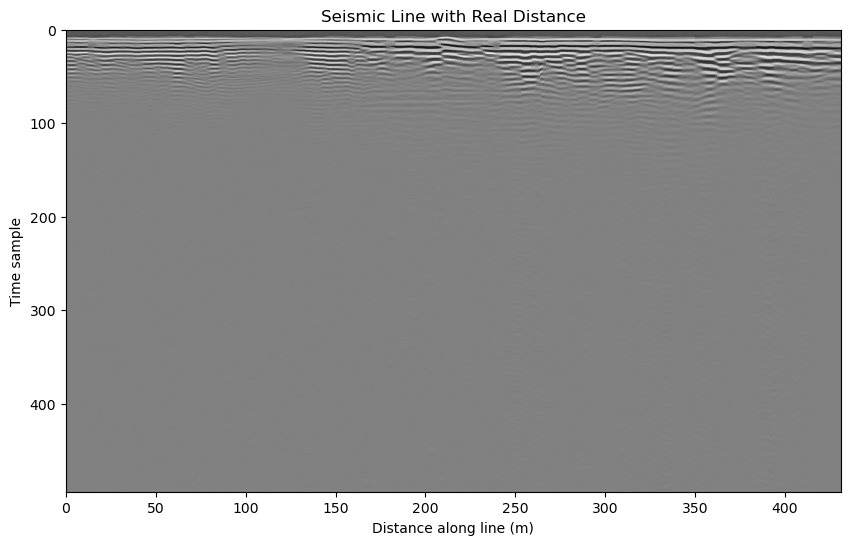

In [12]:
# Plotting with real distance
plt.figure(figsize=(10,6))
extent = [dist.min(), dist.max(), f.tracecount, 0]  # x from 0–distance, y reversed
plt.imshow(data.T, cmap="gray", aspect="auto", extent=extent)

plt.title("Seismic Line with Real Distance")
plt.xlabel("Distance along line (m)")
plt.ylabel("Time sample")
plt.show()

## Adding time as y_axis

Sample interval (ms): 0.1
Time axis length (ms): 499.8


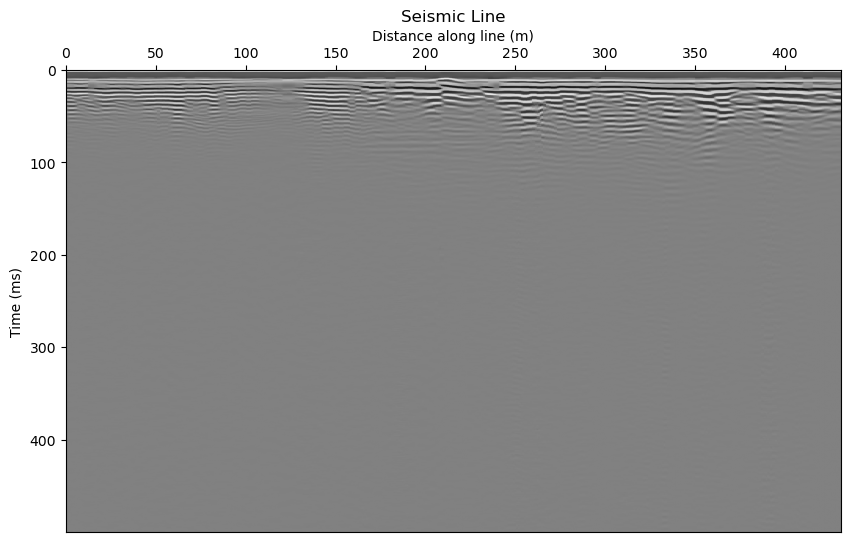

In [ ]:
# Plotting with real distance
plt.figure(figsize=(10,6))
# Setting up time axis
time_axis = np.arange(f.samples.size) * dt
print("Sample interval (ms):", dt)
print("Time axis length (ms):", time_axis[-1])

extent = [dist.min(), dist.max(), time_axis[-1], time_axis[0]]  # setting extent
plt.imshow(data.T, cmap="gray", aspect="auto", extent=extent)

plt.title("Seismic Line")
plt.xlabel("Distance along line (m)")
plt.ylabel("Time (ms)")
plt.gca().xaxis.set_ticks_position('top') # gca = get current axis
plt.gca().xaxis.set_label_position('top')
plt.show()